## for future reference, lesson 3 below:

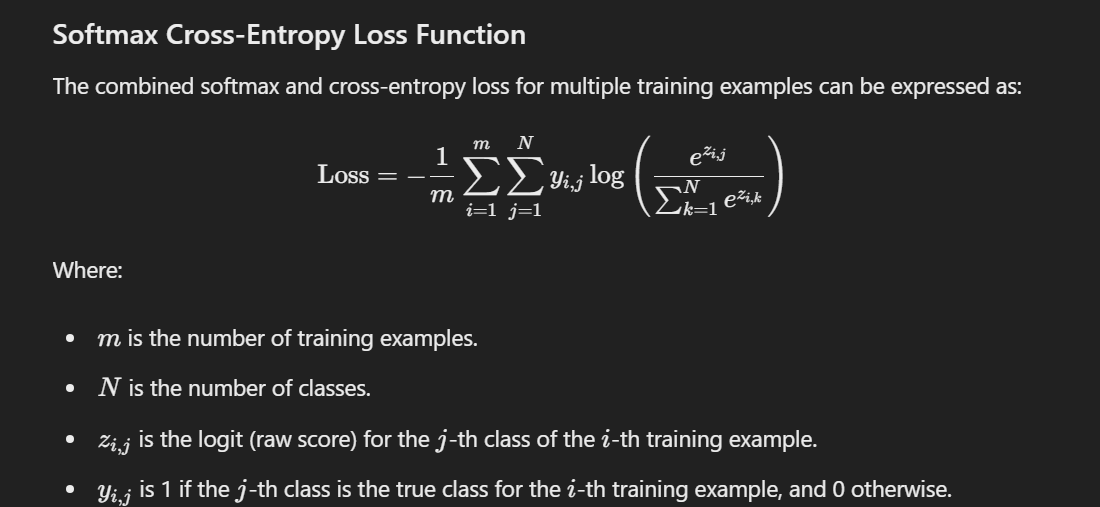
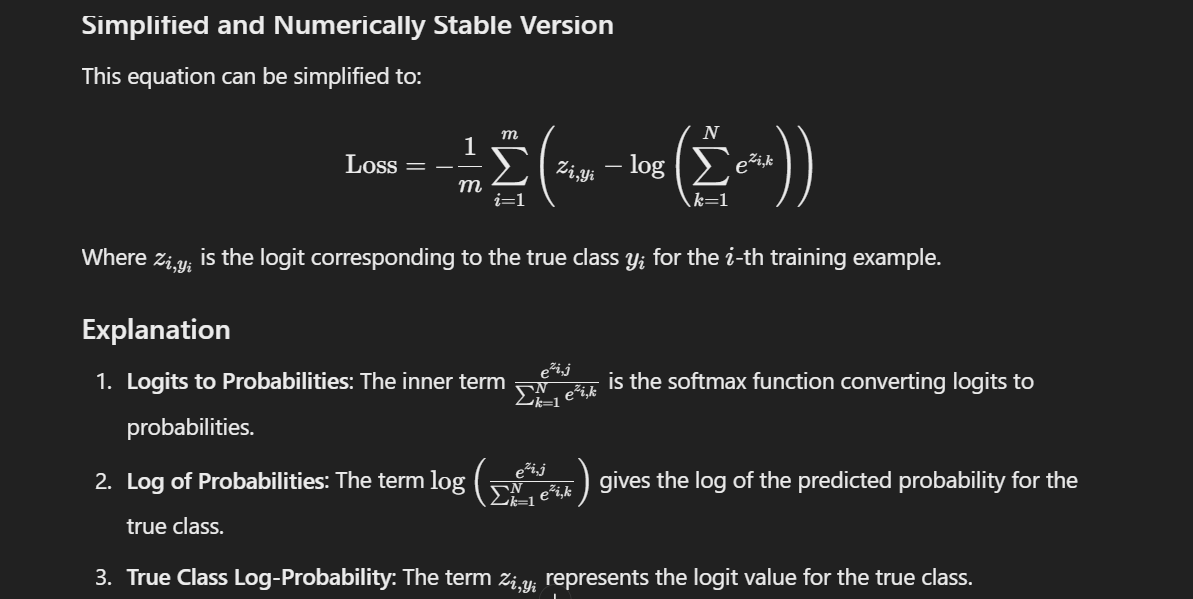

In [1]:
import numpy as np

def softmax_cross_entropy_loss(logits, labels):
    """
    Compute the softmax cross-entropy loss.

    Parameters:
    logits (ndarray): Array of shape (m, N) containing logits for m samples and N classes.
    labels (ndarray): Array of shape (m,) containing the true class indices for m samples.

    Returns:
    loss (float): The computed loss value.
    """
    m = logits.shape[0]
    logits_exp = np.exp(logits)
    sum_logits_exp = np.sum(logits_exp, axis=1, keepdims=True)
    log_probs = logits - np.log(sum_logits_exp)
    correct_log_probs = log_probs[np.arange(m), labels]
    loss = -np.mean(correct_log_probs)
    return loss

# Example usage
logits = np.array([[1.0, 2.0, 3.0], [1.0, 2.0, 3.0]])
labels = np.array([2, 1])
loss = softmax_cross_entropy_loss(logits, labels)
print(f"Loss: {loss}")

Loss: 0.9076059644443801


$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

$$
Precision = \frac{TP}{TP + FP}
$$

$$
Recall = \frac{TP}{TP + FN}
$$

$$
F1 Score = 2 * \frac{Precision * Recall}{Precision + Recall}
$$

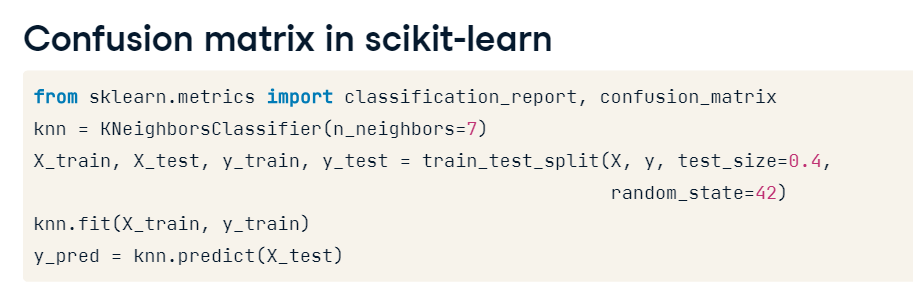
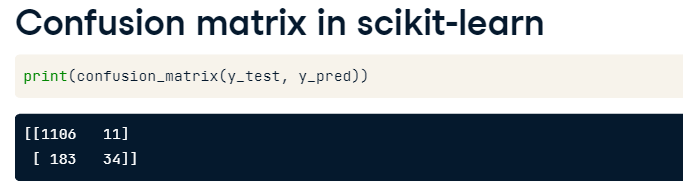
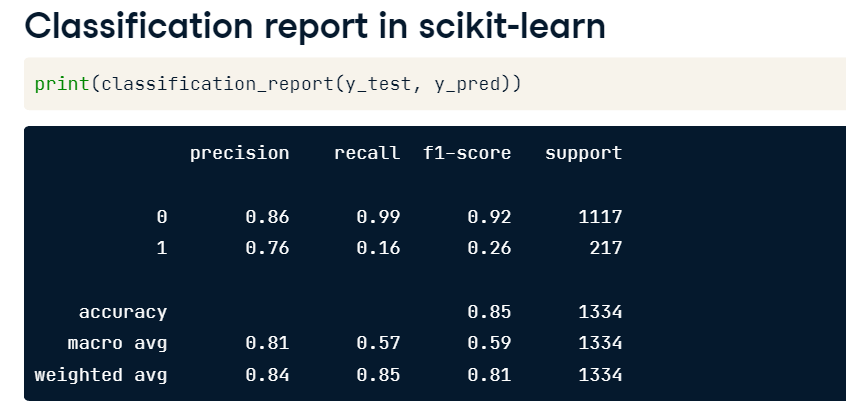

In [3]:
import pandas as pd
diabetes_df = pd.read_csv('diabetes_clean.csv')

In [4]:
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


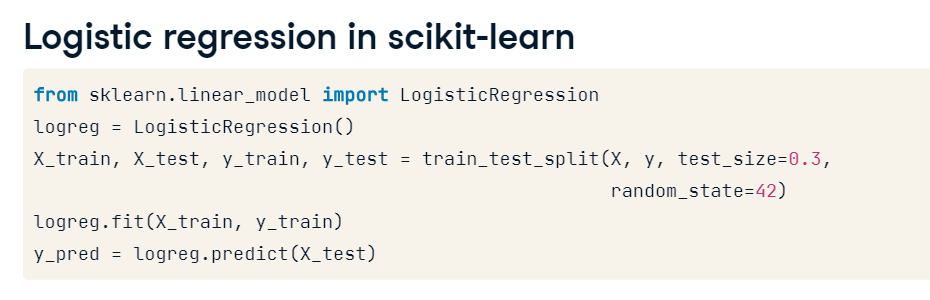

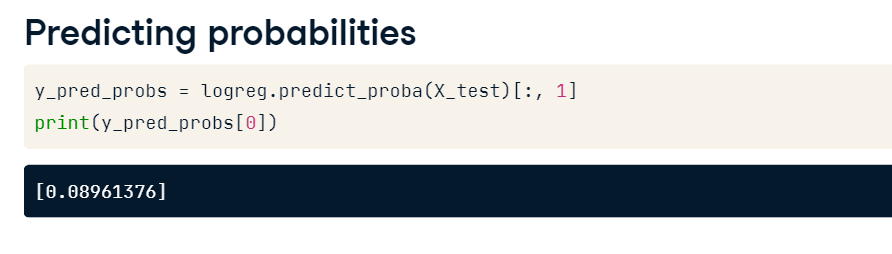

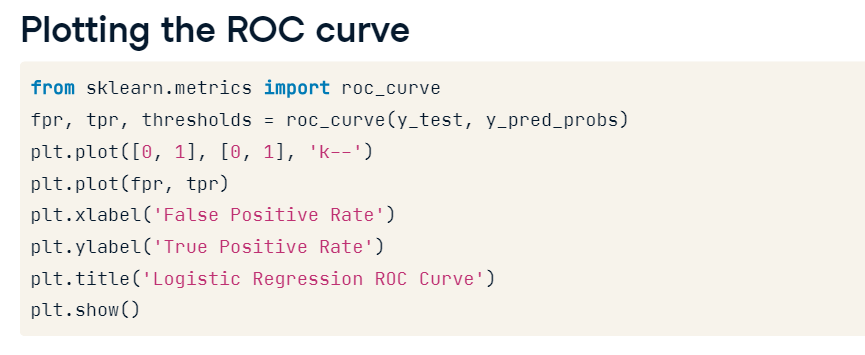
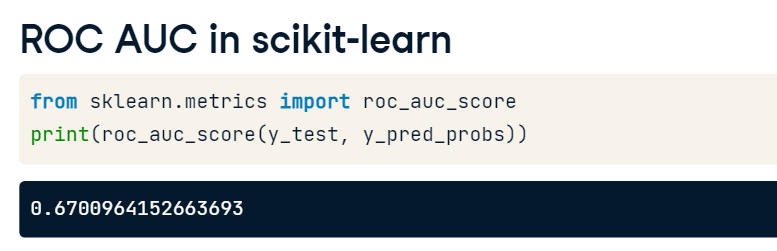

In [5]:
X = diabetes_df.drop('glucose', axis=1).values

In [6]:
X

array([[ 6.   , 72.   , 35.   , ...,  0.627, 50.   ,  1.   ],
       [ 1.   , 66.   , 29.   , ...,  0.351, 31.   ,  0.   ],
       [ 8.   , 64.   ,  0.   , ...,  0.672, 32.   ,  1.   ],
       ...,
       [ 5.   , 72.   , 23.   , ...,  0.245, 30.   ,  0.   ],
       [ 1.   , 60.   ,  0.   , ...,  0.349, 47.   ,  1.   ],
       [ 1.   , 70.   , 31.   , ...,  0.315, 23.   ,  0.   ]])

In [8]:
y = diabetes_df['glucose'].values

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs[:10])

[9.42979193e-11 1.57381220e-04 3.82244573e-03 7.19037090e-03
 8.62209410e-03 1.14213019e-10 5.61757752e-06 9.83356391e-04
 3.93823382e-08 8.50401454e-03]


C:\Users\slate\.anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
# import matplotlib.pyplot as plt

# # Import roc_curve
# from sklearn.metrics import roc_curve

# # Generate ROC curve values: fpr, tpr, thresholds
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# plt.plot([0, 1], [0, 1], 'k--')

# # Plot tpr against fpr
# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve for Diabetes Prediction')
# plt.show()

In [15]:
# # Import roc_auc_score
# from sklearn.metrics import roc_auc_score

# # Calculate roc_auc_score
# print(roc_auc_score(y_test, y_pred_probs))

# # Calculate the confusion matrix
# print(confusion_matrix(y_test, y_pred))

# # Calculate the classification report
# print(classification_report(y_test, y_pred))

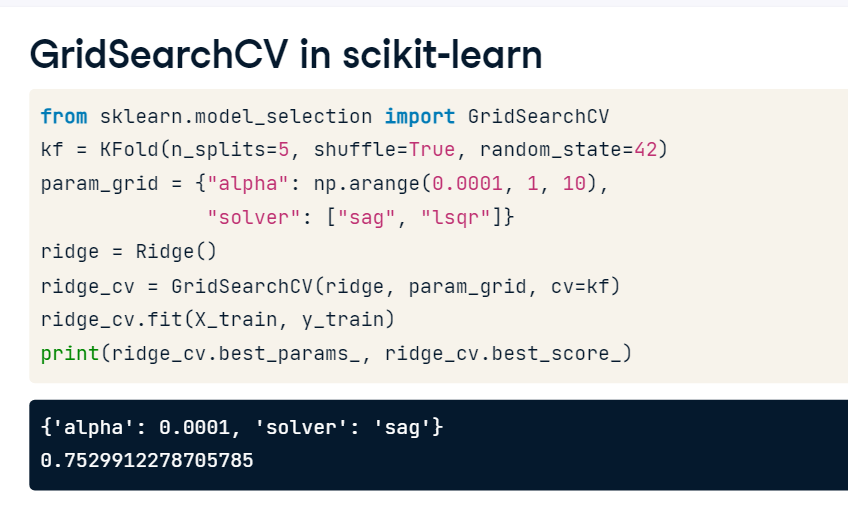

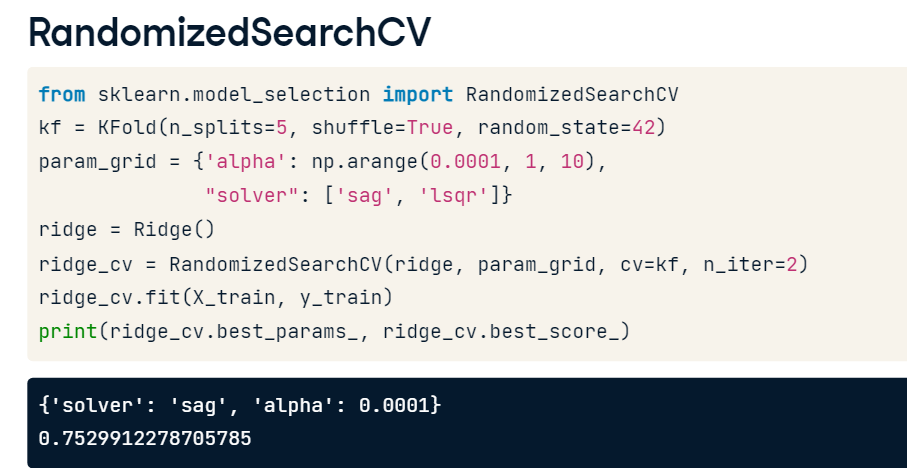
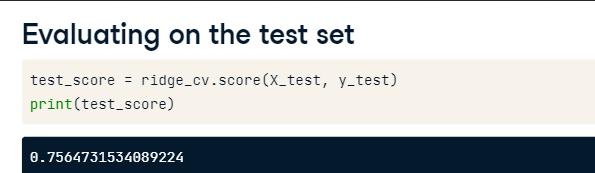

![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)